In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [ ]:
archivo = "/content/drive/MyDrive/Colab Notebooks/DATASET_FINAL.xlsx"
df = pd.read_excel(archivo, sheet_name="ANAR_TODO")

In [ ]:
df = df.dropna(subset=[
    'Countries and areas', 'Indicator', 'Category',
    'Children with functional difficulties', 'Region',
    'Sub-region', 'Development regions'
])

In [ ]:
df = df.rename(columns={
    'Countries and areas': 'pais',
    'Indicator': 'nivel',
    'Category': 'genero',
    'Children with functional difficulties': 'asistencia'
})

In [ ]:
df['pais'] = LabelEncoder().fit_transform(df['pais'])
df['nivel'] = LabelEncoder().fit_transform(df['nivel'])
df['genero'] = LabelEncoder().fit_transform(df['genero'])
df['Region'] = LabelEncoder().fit_transform(df['Region'])
df['Sub-region'] = LabelEncoder().fit_transform(df['Sub-region'])
df['Development regions'] = LabelEncoder().fit_transform(df['Development regions'])


In [ ]:
X = df[['pais', 'nivel', 'genero', 'Region', 'Sub-region', 'Development regions']]
y = df['asistencia']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
modelo = RandomForestRegressor(n_estimators=100, random_state=42)
modelo.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [ ]:
y_pred = modelo.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Resultados del modelo:")
print("MSE:", mse)
print("R2:", r2)

Resultados del modelo:
MSE: 85.62167467741934
R2: 0.9008353111548096


In [ ]:
comparacion = pd.DataFrame({'real': y_test.values, 'prediccion': y_pred})
print(comparacion.head(10))

   real  prediccion
0  78.4      48.183
1  86.7      69.150
2  97.3      90.312
3  62.3      72.241
4  75.1      75.468
5  60.8      72.068
6  85.5      87.237
7  48.8      44.350
8   9.1      20.447
9  94.8      93.630


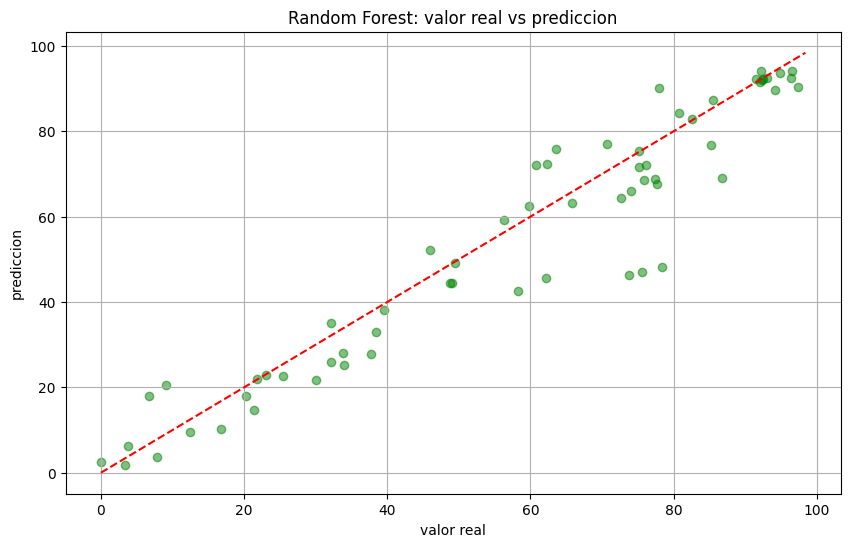

In [ ]:
# graficar
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, color='green', alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.xlabel('valor real')
plt.ylabel('prediccion')
plt.title('Random Forest: valor real vs prediccion')
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
archivo = "/content/drive/MyDrive/Colab Notebooks/DATASET_FINAL.xlsx"
df = pd.read_excel(archivo, sheet_name=' Foundational reading skill')


In [ ]:
df = df.dropna(subset=['Children with functional difficulties'])


In [ ]:
df['Children with functional difficulties'] = pd.to_numeric(
    df['Children with functional difficulties'], errors='coerce'
)

<ipython-input-16-4571f06b0410>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Children with functional difficulties'] = pd.to_numeric(


In [ ]:
valores = df['Children with functional difficulties']


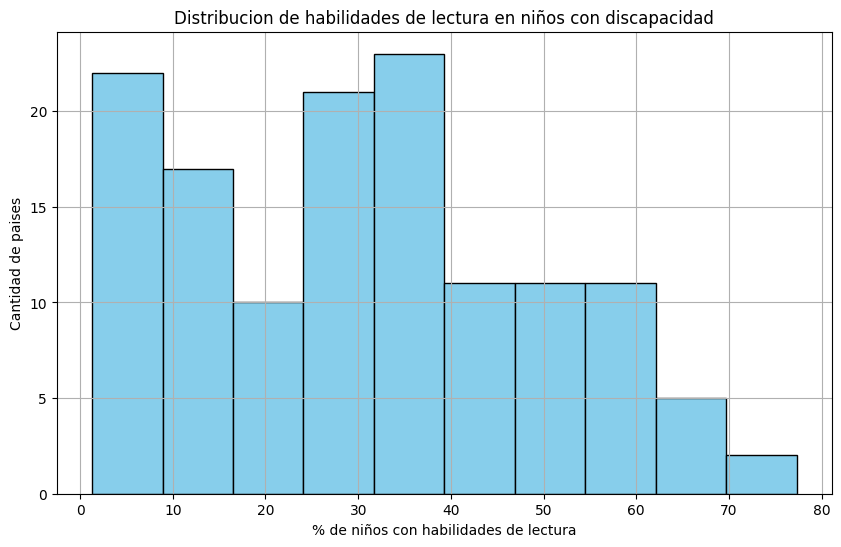

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(valores, bins=10, color='skyblue', edgecolor='black')
plt.title('Distribucion de habilidades de lectura en niños con discapacidad')
plt.xlabel('% de niños con habilidades de lectura')
plt.ylabel('Cantidad de paises')
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
archivo = "/content/drive/MyDrive/Colab Notebooks/DATASET_FINAL.xlsx"
df = pd.read_excel(archivo, sheet_name='Foundational numeracy skill')


In [ ]:
df = df.dropna(subset=['Children with functional difficulties'])


In [ ]:
df['Children with functional difficulties'] = pd.to_numeric(
    df['Children with functional difficulties'], errors='coerce'
)

In [ ]:
valores = df['Children with functional difficulties']

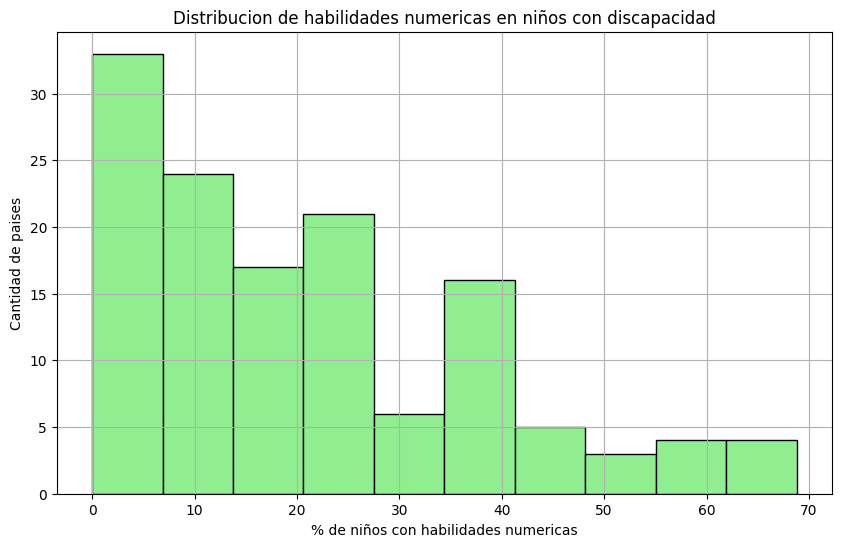

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(valores, bins=10, color='lightgreen', edgecolor='black')
plt.title('Distribucion de habilidades numericas en niños con discapacidad')
plt.xlabel('% de niños con habilidades numericas')
plt.ylabel('Cantidad de paises')
plt.grid(True)
plt.show()

In [ ]:
reading_df = pd.read_excel(archivo, sheet_name=' Foundational reading skill')
reading_df['Children with functional difficulties'] = pd.to_numeric(
    reading_df['Children with functional difficulties'], errors='coerce')
reading_df = reading_df.dropna(subset=['Children with functional difficulties'])
reading_df = reading_df.rename(columns={'Children with functional difficulties': 'Reading Skill'})


In [ ]:
numeracy_df = pd.read_excel(archivo, sheet_name='Foundational numeracy skill')
numeracy_df['Children with functional difficulties'] = pd.to_numeric(
    numeracy_df['Children with functional difficulties'], errors='coerce')
numeracy_df = numeracy_df.dropna(subset=['Children with functional difficulties'])
numeracy_df = numeracy_df.rename(columns={'Children with functional difficulties': 'Numeracy Skill'})


In [ ]:
combined_df = pd.merge(
    reading_df[['Countries and areas', 'Reading Skill']],
    numeracy_df[['Countries and areas', 'Numeracy Skill']],
    on='Countries and areas',
    how='inner'
)

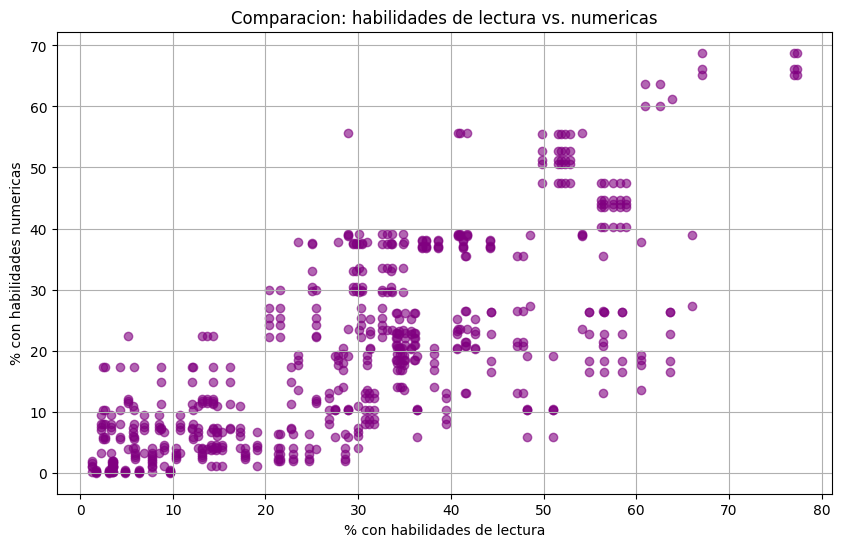

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(combined_df['Reading Skill'], combined_df['Numeracy Skill'], alpha=0.6, color='purple')
plt.xlabel('% con habilidades de lectura')
plt.ylabel('% con habilidades numericas')
plt.title('Comparacion: habilidades de lectura vs. numericas')
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
archivo = "/content/drive/MyDrive/Colab Notebooks/DATASET_FINAL.xlsx"
df = pd.read_excel(archivo, sheet_name="ANAR_TODO")

In [ ]:
df = df.dropna(subset=[
    'Countries and areas', 'Indicator', 'Category',
    'Children with functional difficulties', 'Region',
    'Sub-region', 'Development regions'
])

In [ ]:
df = df.rename(columns={
    'Countries and areas': 'pais',
    'Indicator': 'nivel',
    'Category': 'genero',
    'Children with functional difficulties': 'asistencia'
})


In [ ]:
def clasificar(valor):
    if valor >= 80:
        return 'Alta'
    elif valor >= 50:
        return 'Media'
    else:
        return 'Baja'

df['inclusion'] = df['asistencia'].apply(clasificar)

In [ ]:
df['pais'] = LabelEncoder().fit_transform(df['pais'])
df['nivel'] = LabelEncoder().fit_transform(df['nivel'])
df['genero'] = LabelEncoder().fit_transform(df['genero'])
df['Region'] = LabelEncoder().fit_transform(df['Region'])
df['Sub-region'] = LabelEncoder().fit_transform(df['Sub-region'])
df['Development regions'] = LabelEncoder().fit_transform(df['Development regions'])
df['inclusion'] = LabelEncoder().fit_transform(df['inclusion'])


In [ ]:
df['pais'] = LabelEncoder().fit_transform(df['pais'])
df['nivel'] = LabelEncoder().fit_transform(df['nivel'])
df['genero'] = LabelEncoder().fit_transform(df['genero'])
df['Region'] = LabelEncoder().fit_transform(df['Region'])
df['Sub-region'] = LabelEncoder().fit_transform(df['Sub-region'])
df['Development regions'] = LabelEncoder().fit_transform(df['Development regions'])
df['inclusion'] = LabelEncoder().fit_transform(df['inclusion'])


In [ ]:
X = df[['pais', 'nivel', 'genero', 'Region', 'Sub-region', 'Development regions']]
y = df['inclusion']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
modelo = RandomForestClassifier(n_estimators=100, random_state=42)
modelo.fit(x_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
y_pred = modelo.predict(x_test)

In [ ]:
print("precision del modelo:", accuracy_score(y_test, y_pred))
print("reporte de clasificacion:")
print(classification_report(y_test, y_pred))

precision del modelo: 0.9516129032258065
reporte de clasificacion:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        16
           1       0.96      1.00      0.98        25
           2       0.95      0.90      0.93        21

    accuracy                           0.95        62
   macro avg       0.95      0.95      0.95        62
weighted avg       0.95      0.95      0.95        62



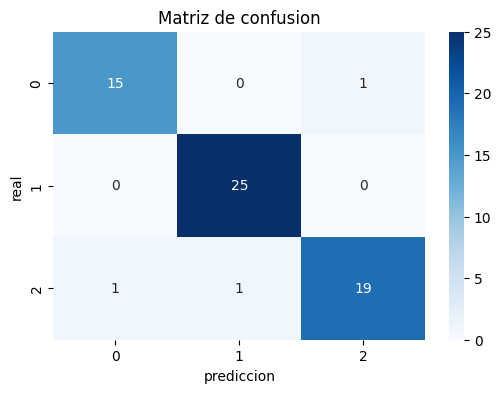

In [ ]:
matriz = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(matriz, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de confusion")
plt.xlabel("prediccion")
plt.ylabel("real")
plt.show()

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
archivo = "/content/drive/MyDrive/Colab Notebooks/DATASET_FINAL.xlsx"


In [ ]:
anar = pd.read_excel(archivo, sheet_name="ANAR_TODO")
reading = pd.read_excel(archivo, sheet_name=" Foundational reading skill")
numeracy = pd.read_excel(archivo, sheet_name="Foundational numeracy skill")


In [ ]:
anar = anar[['Countries and areas', 'Children with functional difficulties']].dropna()
reading = reading[['Countries and areas', 'Children with functional difficulties']].dropna()
numeracy = numeracy[['Countries and areas', 'Children with functional difficulties']].dropna()

In [ ]:
anar = anar.rename(columns={'Countries and areas': 'pais', 'Children with functional difficulties': 'asistencia'})
reading = reading.rename(columns={'Countries and areas': 'pais', 'Children with functional difficulties': 'lectura'})
numeracy = numeracy.rename(columns={'Countries and areas': 'pais', 'Children with functional difficulties': 'matematicas'})

In [ ]:
df = anar.merge(reading, on='pais', how='inner')
df = df.merge(numeracy, on='pais', how='inner')

In [ ]:
for col in ['asistencia', 'lectura', 'matematicas']:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df = df.dropna()

In [ ]:
escalador = StandardScaler()
X = escalador.fit_transform(df[['asistencia', 'lectura', 'matematicas']])

In [ ]:
inercia = []
K = range(1, 11)
for k in K:
    modelo = KMeans(n_clusters=k, random_state=42, n_init=10)
    modelo.fit(X)
    inercia.append(modelo.inertia_)

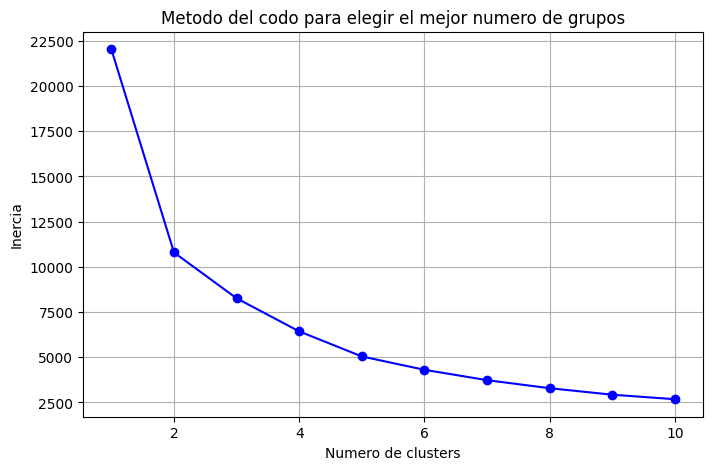

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(K, inercia, 'bo-')
plt.xlabel('Numero de clusters')
plt.ylabel('Inercia')
plt.title('Metodo del codo para elegir el mejor numero de grupos')
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
archivo = "/content/drive/MyDrive/Colab Notebooks/DATASET_FINAL.xlsx"


In [ ]:
anar = pd.read_excel(archivo, sheet_name="ANAR_TODO")
lectura = pd.read_excel(archivo, sheet_name=" Foundational reading skill")
mate = pd.read_excel(archivo, sheet_name="Foundational numeracy skill")


In [ ]:
anar = anar[['Countries and areas', 'Children with functional difficulties']].dropna()
lectura = lectura[['Countries and areas', 'Children with functional difficulties']].dropna()
mate = mate[['Countries and areas', 'Children with functional difficulties']].dropna()


In [ ]:
anar = anar.rename(columns={'Countries and areas': 'pais', 'Children with functional difficulties': 'asistencia'})
lectura = lectura.rename(columns={'Countries and areas': 'pais', 'Children with functional difficulties': 'lectura'})
mate = mate.rename(columns={'Countries and areas': 'pais', 'Children with functional difficulties': 'matematicas'})


In [ ]:
df = anar.merge(lectura, on='pais', how='inner')
df = df.merge(mate, on='pais', how='inner')

In [ ]:
df['asistencia'] = pd.to_numeric(df['asistencia'], errors='coerce')
df['lectura'] = pd.to_numeric(df['lectura'], errors='coerce')
df['matematicas'] = pd.to_numeric(df['matematicas'], errors='coerce')
df = df.dropna()


In [ ]:
escalador = StandardScaler()
X = escalador.fit_transform(df[['asistencia', 'lectura', 'matematicas']])


In [ ]:
modelo = KMeans(n_clusters=3, random_state=42, n_init=10)
df['grupo'] = modelo.fit_predict(X)

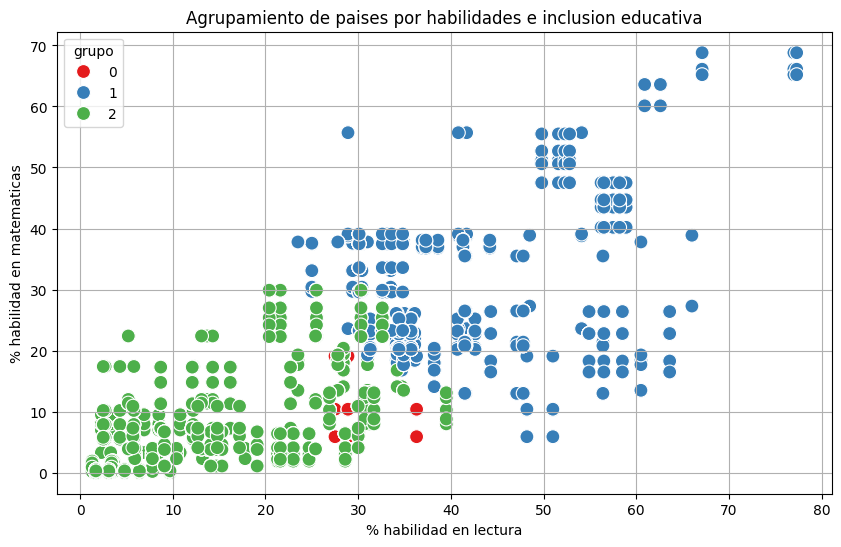

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='lectura',
    y='matematicas',
    hue='grupo',
    palette='Set1',
    s=100
)
plt.title('Agrupamiento de paises por habilidades e inclusion educativa')
plt.xlabel('% habilidad en lectura')
plt.ylabel('% habilidad en matematicas')
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
archivo = "/content/drive/MyDrive/Colab Notebooks/DATASET_FINAL.xlsx"

In [ ]:
anar = pd.read_excel(archivo, sheet_name="ANAR_TODO")
lectura = pd.read_excel(archivo, sheet_name=" Foundational reading skill")
mate = pd.read_excel(archivo, sheet_name="Foundational numeracy skill")

In [ ]:
anar = anar[['Countries and areas', 'Children with functional difficulties']].dropna()
lectura = lectura[['Countries and areas', 'Children with functional difficulties']].dropna()
mate = mate[['Countries and areas', 'Children with functional difficulties']].dropna()


In [ ]:
anar = anar.rename(columns={'Countries and areas': 'pais', 'Children with functional difficulties': 'asistencia'})
lectura = lectura.rename(columns={'Countries and areas': 'pais', 'Children with functional difficulties': 'lectura'})
mate = mate.rename(columns={'Countries and areas': 'pais', 'Children with functional difficulties': 'matematicas'})


In [ ]:
df = anar.merge(lectura, on='pais', how='inner')
df = df.merge(mate, on='pais', how='inner')


In [ ]:
for col in ['asistencia', 'lectura', 'matematicas']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [ ]:
df = df.dropna()

In [ ]:
escalador = StandardScaler()
X = escalador.fit_transform(df[['asistencia', 'lectura', 'matematicas']])


In [ ]:
modelo = KMeans(n_clusters=3, random_state=42, n_init=10)
df['grupo'] = modelo.fit_predict(X)

In [ ]:
resumen = df.groupby('grupo').apply(lambda x: x[['pais', 'asistencia', 'lectura', 'matematicas']].head(5)).reset_index(drop=True)


<ipython-input-75-e248c2111ee4>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  resumen = df.groupby('grupo').apply(lambda x: x[['pais', 'asistencia', 'lectura', 'matematicas']].head(5)).reset_index(drop=True)


In [ ]:
print(resumen)

                        pais  asistencia  lectura  matematicas
0   Central African Republic        71.3      3.5          1.1
1   Central African Republic        71.3      3.5          1.9
2   Central African Republic        71.3      3.5          0.2
3   Central African Republic        71.3      3.5          1.6
4   Central African Republic        71.3      3.5          0.9
5                 Bangladesh        72.1     35.7         22.7
6                 Bangladesh        72.1     35.7         20.5
7                 Bangladesh        72.1     35.7         25.2
8                 Bangladesh        72.1     35.7         20.2
9                 Bangladesh        72.1     35.7         23.2
10                      Chad        38.3      4.3          7.9
11                      Chad        38.3      4.3         10.2
12                      Chad        38.3      4.3          5.5
13                      Chad        38.3      4.3         17.4
14                      Chad        38.3      4.3      

In [ ]:
#EXTRASSSSSSSSSSS

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
archivo = "/content/drive/MyDrive/Colab Notebooks/DATASET_FINAL.xlsx"
df = pd.read_excel(archivo, sheet_name="ANAR_TODO")

In [ ]:
df = df.dropna(subset=['Countries and areas', 'Children with functional difficulties'])
df = df.rename(columns={'Countries and areas': 'Country', 'Children with functional difficulties': 'Value'})

In [ ]:
promedios = df.groupby('Country')['Value'].mean().sort_values(ascending=False)

In [ ]:
top10 = promedios.head(10)
bottom10 = promedios.tail(10)

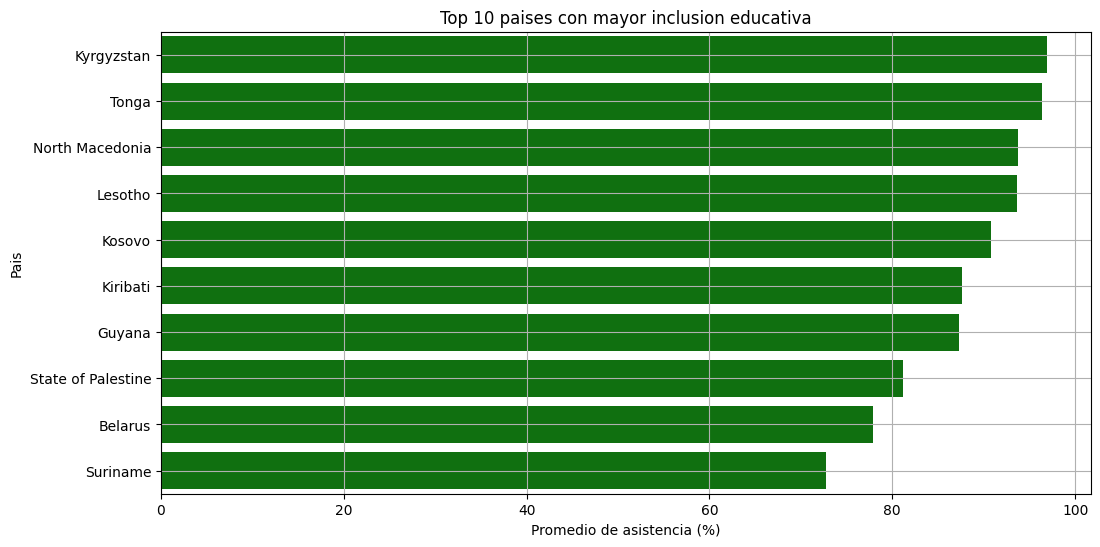

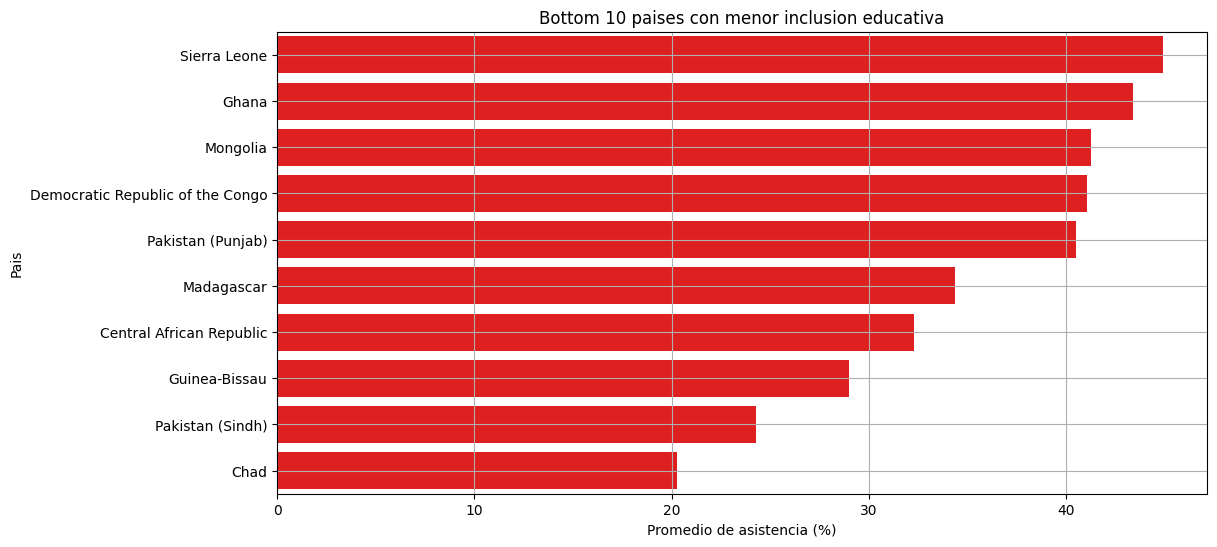

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x=top10.values, y=top10.index, color='green')
plt.title("Top 10 paises con mayor inclusion educativa")
plt.xlabel("Promedio de asistencia (%)")
plt.ylabel("Pais")
plt.grid(True)
plt.show()

plt.figure(figsize=(12,6))
sns.barplot(x=bottom10.values, y=bottom10.index, color='red')
plt.title("Bottom 10 paises con menor inclusion educativa")
plt.xlabel("Promedio de asistencia (%)")
plt.ylabel("Pais")
plt.grid(True)
plt.show()

In [ ]:
df = pd.read_excel(archivo, sheet_name="ANAR_TODO")
df = df.dropna(subset=['Region', 'Children with functional difficulties'])
df = df.rename(columns={'Children with functional difficulties': 'Asistencia', 'Region': 'Region'})

In [ ]:
region_avg = df.groupby('Region')['Asistencia'].mean().sort_values(ascending=False)

<ipython-input-87-354f2c65df33>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_avg.values, y=region_avg.index, palette='viridis')


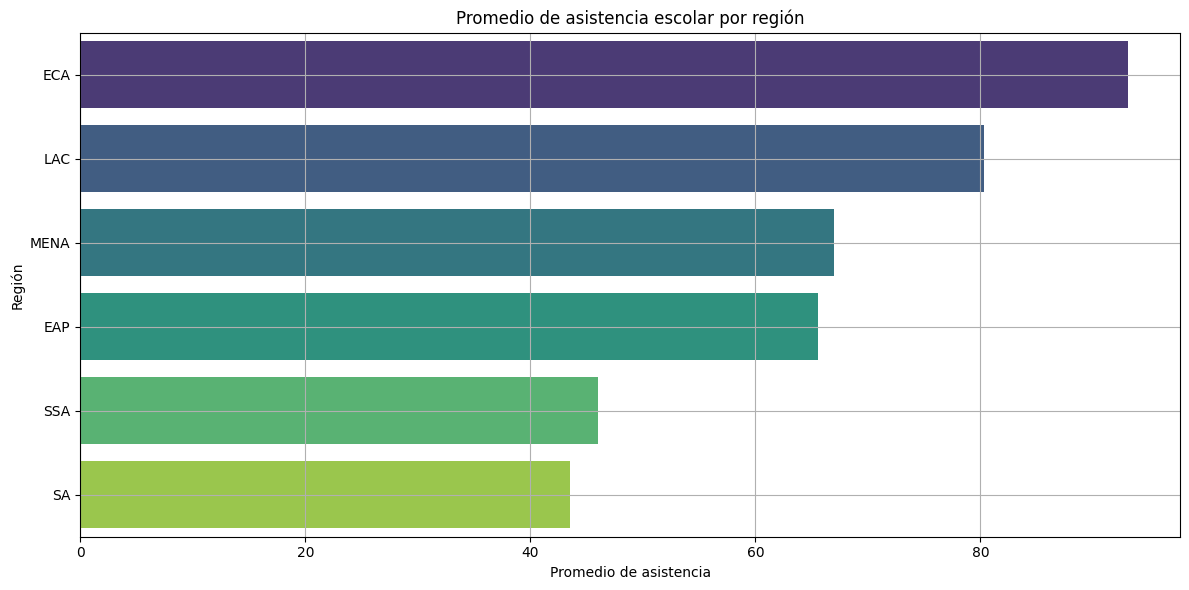

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x=region_avg.values, y=region_avg.index, palette='viridis')
plt.title('Promedio de asistencia escolar por región')
plt.xlabel('Promedio de asistencia')
plt.ylabel('Región')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
df = pd.read_excel(archivo, sheet_name="ANAR_TODO")
df = df.dropna(subset=['Sub-region', 'Children with functional difficulties'])
df = df.rename(columns={'Children with functional difficulties': 'Asistencia', 'Sub-region': 'Subregion'})

In [ ]:
subregion_avg = df.groupby('Subregion')['Asistencia'].mean().sort_values(ascending=False)

<ipython-input-90-d9ea221b0300>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=subregion_avg.values, y=subregion_avg.index, palette='coolwarm')


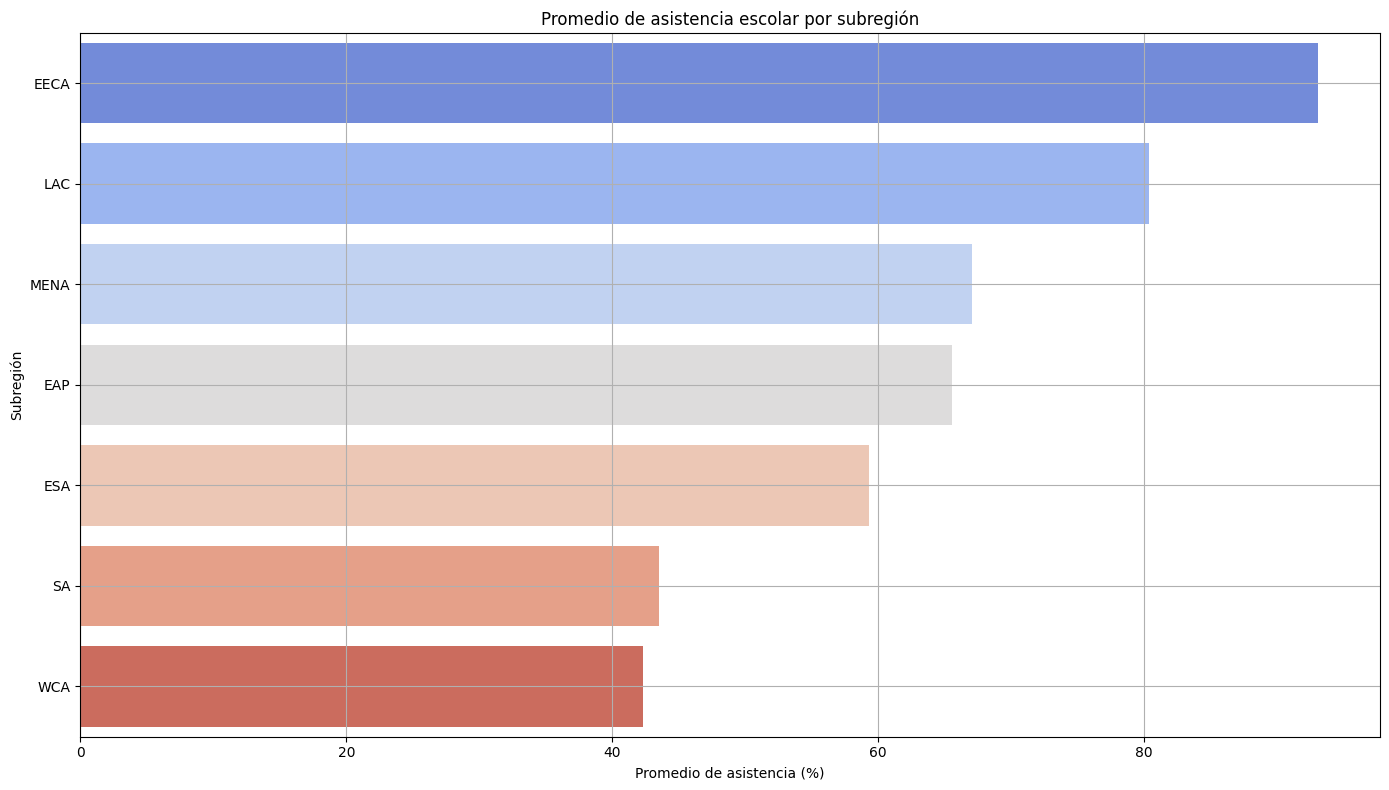

In [ ]:
plt.figure(figsize=(14, 8))
sns.barplot(x=subregion_avg.values, y=subregion_avg.index, palette='coolwarm')
plt.title('Promedio de asistencia escolar por subregión')
plt.xlabel('Promedio de asistencia (%)')
plt.ylabel('Subregión')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
df = pd.read_excel(archivo, sheet_name="ANAR_TODO")

In [ ]:
pais = "Bangladesh"
pais_df = df[df['Countries and areas'] == pais]

In [ ]:
prom_asistencia = pais_df['Children with functional difficulties'].mean()

In [ ]:
reading_df = pd.read_excel(archivo, sheet_name=' Foundational reading skill')
reading = reading_df[reading_df['Countries and areas'] == pais]['Children with functional difficulties'].mean()

In [ ]:
numeracy_df = pd.read_excel(archivo, sheet_name='Foundational numeracy skill')
numeracy = numeracy_df[numeracy_df['Countries and areas'] == pais]['Children with functional difficulties'].mean()

In [ ]:
valores = [prom_asistencia, reading, numeracy]
categorias = ['Asistencia Escolar', 'Habilidad Lectura', 'Habilidad Matemáticas']

<ipython-input-100-71417b91a46a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=valores, y=categorias, palette='pastel')


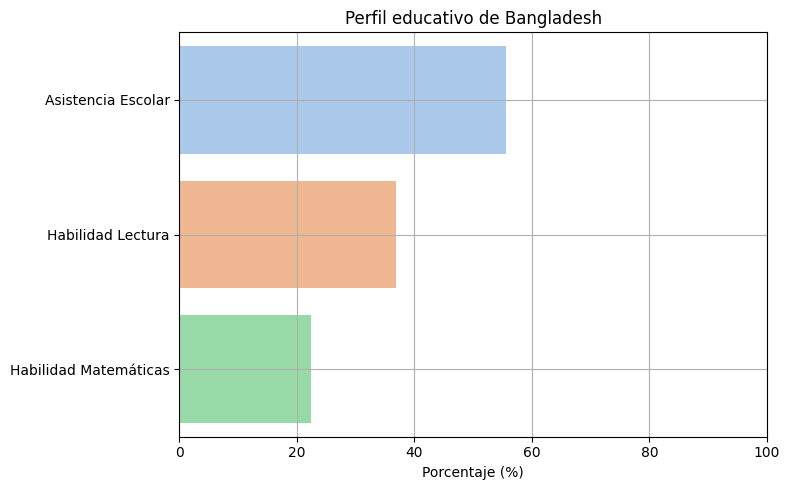

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(x=valores, y=categorias, palette='pastel')
plt.title(f'Perfil educativo de {pais}')
plt.xlabel('Porcentaje')
plt.xlim(0, 100)
plt.grid(True)
plt.tight_layout()
plt.show()